<a href="https://colab.research.google.com/github/bpezet/mrcnn/blob/main/multi_class_maskrcnn_open_images_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls /root/fiftyone/open-images-v6/train/data

#Install required packages

In [ ]:
%cd
  
!git clone --quiet https://github.com/matterport/Mask_RCNN.git

/root


In [ ]:
%cd ~/Mask_RCNN

!pip install -q PyDrive

!pip uninstall tensorflow -y
!pip install tensorflow==1.13.1 -y

!sed -i -- 's/tensorflow>=1.3.0/tensorflow-gpu==1.13.1/g' requirements.txt
!sed -i -- 's/keras>=2.0.8/keras==2.0.8/g' requirements.txt
!sed -i -- 's/h5py/h5py==2.10.0/g' requirements.txt
!pip install -r requirements.txt

!python setup.py install

/root/Mask_RCNN
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y
     |████████████████████████████████| 345.0 MB 4.2 kB/s 
     |████████████████████████████████| 276 kB 49.8 MB/s 
     |████████████████████████████████| 2.9 MB 16.7 MB/s 
     |████████████████████████████████| 3.2 MB 30.7 MB/s 
     |████████████████████████████████| 367 kB 49.9 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 297 kB 38.2 MB/s 
     |████████████████████████████████| 154 kB 49.9 MB/s 
  Attempting uninstall: h5py
    Found existing installation:

#Download and extract dataset (from fiftyone)
Update fileId variable with Google Drive id of your open-images-v6.zip and export.zip


### Fiftyone masks (~15min)

In [ ]:
%mkdir /root/fiftyone
%cd /root/fiftyone

fileId = '15Y-y5fg2axDmJX8cd8Qc9bvauOXwEzH8'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

/root/fiftyone
Extracted zip file 15Y-y5fg2axDmJX8cd8Qc9bvauOXwEzH8.zip


### Fiftyone train data

In [ ]:
%cd /root/fiftyone/open-images-v6/train/

fileId = '1vi6_nJQU8x1tRgAshtGDBI3OA4xqNyiQ'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

%mv ~/fiftyone/open-images-v6/train/export/* ~/fiftyone/open-images-v6/train/data
print('export/ directoy moved into train/data/')

/root/fiftyone/open-images-v6/train
Extracted zip file 1vi6_nJQU8x1tRgAshtGDBI3OA4xqNyiQ.zip
export/ directoy moved into train/data/


### Fiftyone train metadata

In [ ]:
%cd /root/fiftyone/open-images-v6/train/

fileId = '1qxfnAZt1I3KLn6paUxWMuECJrpKzdzou'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

/root/fiftyone/open-images-v6/train
Extracted zip file 1qxfnAZt1I3KLn6paUxWMuECJrpKzdzou.zip


### Fiftyone validation data


In [ ]:
%cd /root/fiftyone/open-images-v6/validation/

fileId = '1ECTMDuu4OIaZHlfucCitsfFbOabFHwcX'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

/root/fiftyone/open-images-v6/validation
Extracted zip file 1ECTMDuu4OIaZHlfucCitsfFbOabFHwcX.zip


### Rename directories

In [ ]:
TRAIN_DIR = os.path.expanduser("/root/fiftyone/open-images-v6/train/data")
for folder in next(os.walk(TRAIN_DIR))[1]:
  old_dir = os.path.join(TRAIN_DIR, folder)
  new_dir = os.path.join(TRAIN_DIR, folder.capitalize().replace('_',' '))
  if folder.startswith('drill'):
    new_dir = os.path.join(TRAIN_DIR, (folder.capitalize()+' (Tool)'))
  %mv {old_dir} "{new_dir}"
    

#Upload openimages_multi_classes.py
*  set epochs number



In [ ]:
%cd ~/Mask_RCNN/samples/
%mkdir openimages/
%cd openimages

print("Please upload the openimages_multi_classes.py to your google colab")
from google.colab import files
f = files.upload()
fname = list(f)[0]
src = list(f.values())[0]
open('openimages.py','wb').write(src)

epoch_number = 5

!sed -i -- 's/epochs=30/epochs={epoch_number}/g' openimages.py

# remove uploaded file to keep one 'openimages.py' file
!rm {fname}

/root/Mask_RCNN/samples
/root/Mask_RCNN/samples/openimages
Please upload the openimages_multi_classes.py to your google colab


Saving openimages_multi_classes.py to openimages_multi_classes.py


---
# Partie non vérifiée à finir

# Train model
Pretrained weights options are COCO, ImageNet or a model trained before

In [ ]:
%cd ~/Mask_RCNN/samples/openimages

# use imagenet model ?
# !python openimages.py train --dataset=../../../fiftyone/open-images-v6 --model=imagenet
!python openimages.py train --dataset=/root/fiftyone/open-images-v6 --model=coco
# !python openimages.py train --dataset=/root/fiftyone/open-images-v6 --model=last

/root/Mask_RCNN/samples/openimages
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---

# Detection (copy of 1-class notebook)

## Notebook preferences

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Configurations

In [ ]:
import os
import sys
import random
import matplotlib.pyplot as plt
ROOT_DIR = os.path.join(os.path.expanduser('~'), 'Mask_RCNN')
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'samples/openimages'))
from mrcnn import model as modellib
from mrcnn import visualize
from openimages import OpenimagesConfig as Config
import openimages

class InferenceConfig(Config):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

#find last model
model_path = model.find_last()

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /root/Mask_RCNN/logs/openimages20220126T1053/mask_rcnn_openimages_0009.h5
Re-starting from epoch 9


## Detect

In [ ]:
# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "dataset/images")
# Load dataset
dataset_val = openimages.OpenimagesDataset()

m = globals()['dataset_val']
load = getattr(m, 'load_'+object_name)
load(DATASET_DIR, subset="validation")
dataset_val.prepare()

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    4.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -108.80000  max:  134.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000

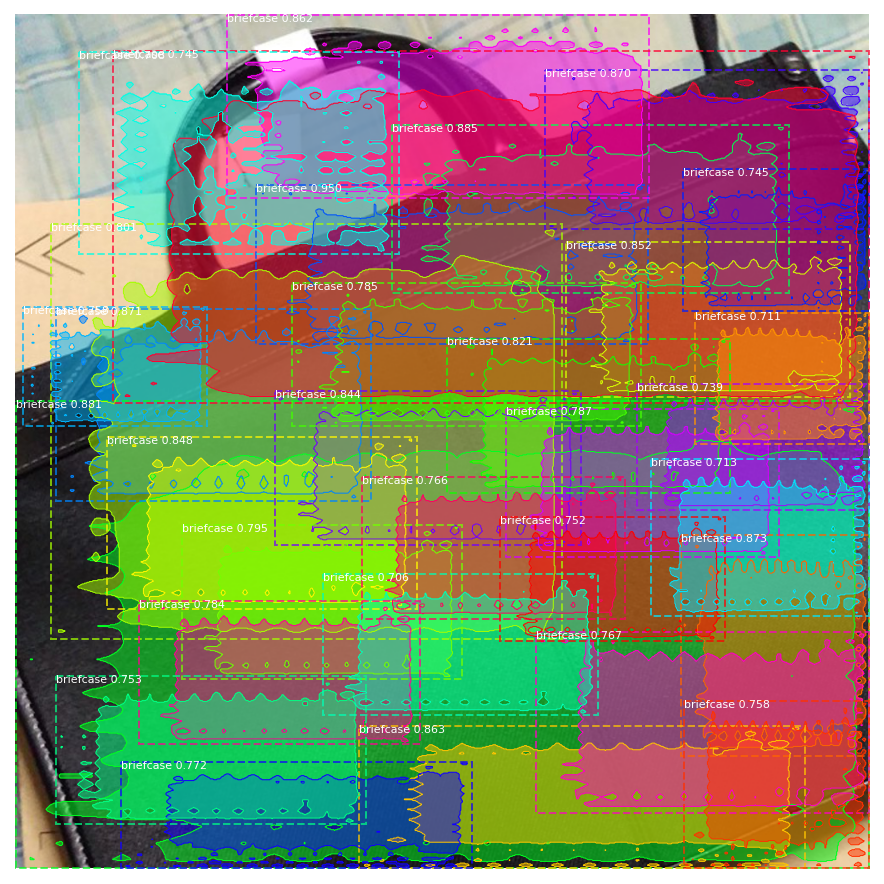

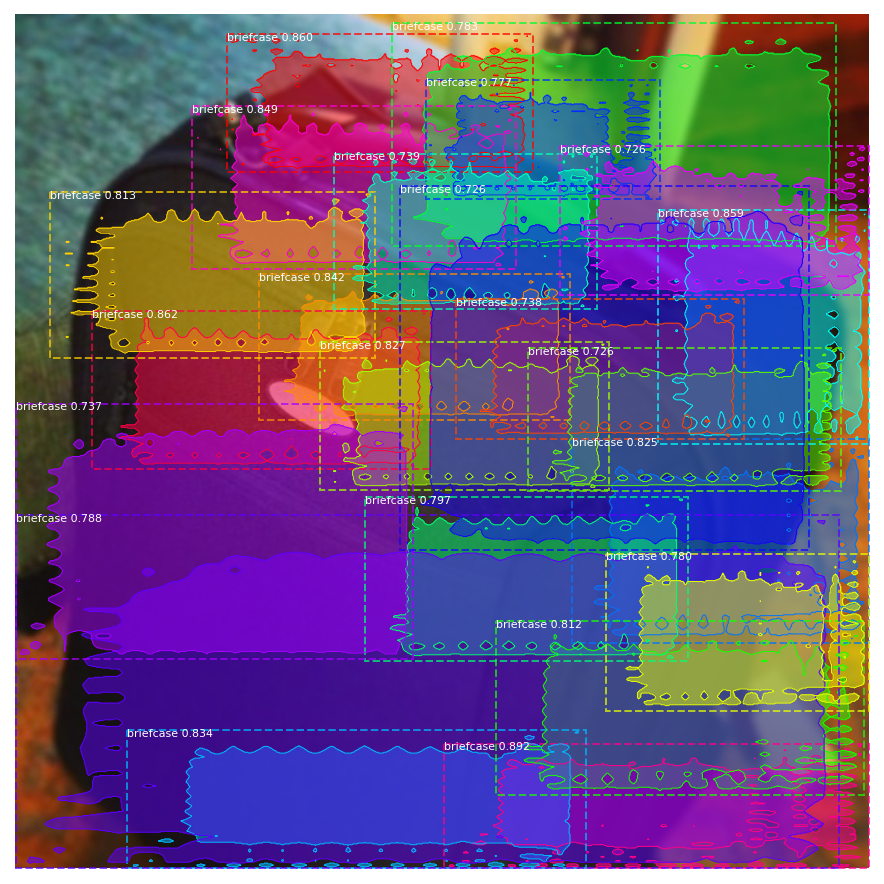

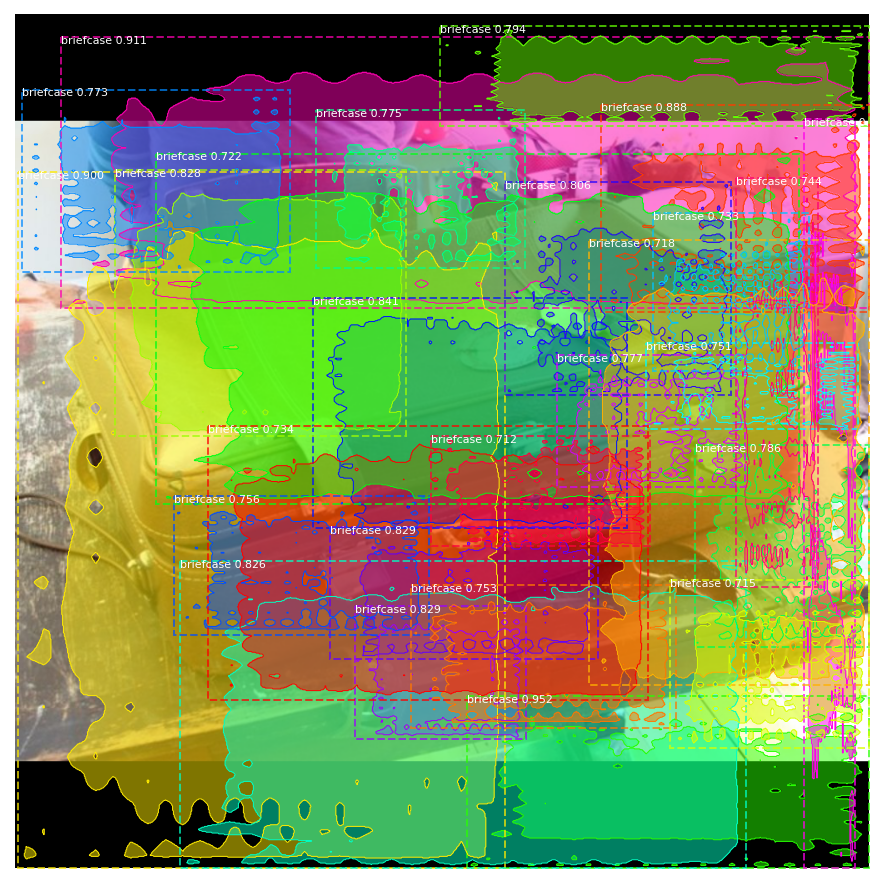

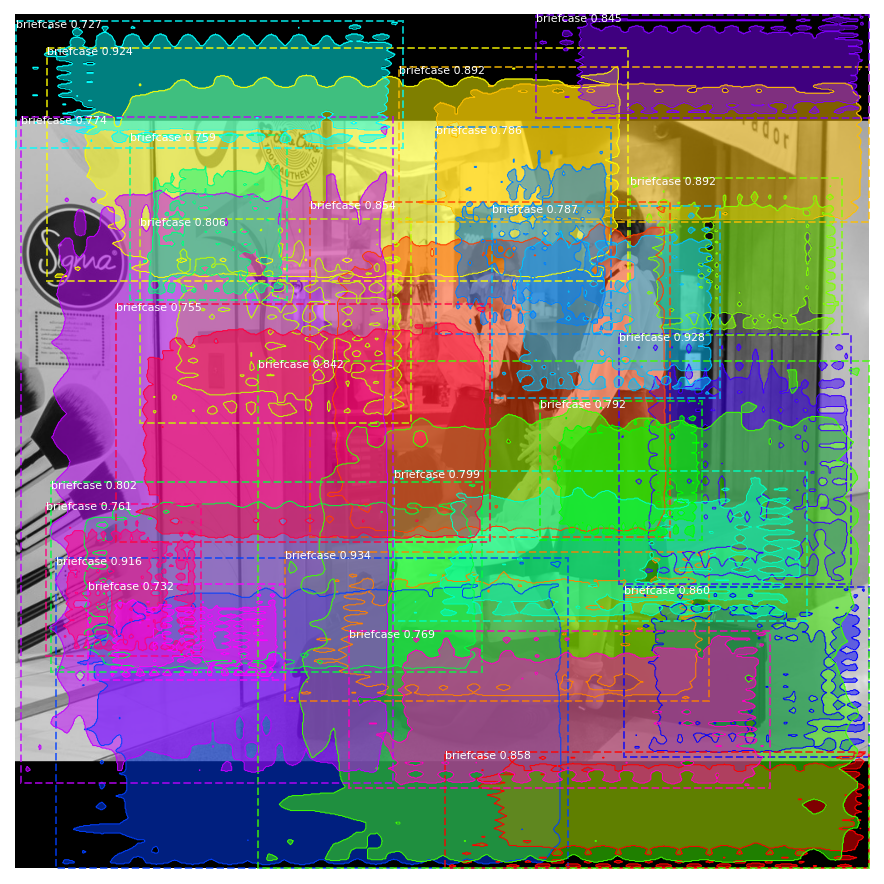

In [ ]:
for image_id in dataset_val.image_ids:
  original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset_val, inference_config, 
                            image_id, use_mini_mask=False)
  results = model.detect([original_image], verbose=1)

  r = results[0]
  visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                              dataset_val.class_names, r['scores'], ax=get_ax())

# Téléchargement data

## Install dependencies


In [ ]:
!pip uninstall folium -y
!pip install folium==0.2.1
!pip install opencv-python-headless==4.1.2.30
!pip install fiftyone

ERROR: Operation cancelled by user
     |████████████████████████████████| 69 kB 4.9 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=46e87ffaae0807e68c6796301a046f94f33a71557d501a66129ddff645deb8ba
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 21.8 MB 96 kB/s 
     |████████████████████████████████| 1.2 MB 7.8 MB/s 
     |████████████████████████████████| 564 kB 60.0 MB/s 
     |████████████████████████████████| 226 kB 64.9 MB/s 
     |████████████████████████████████| 13.2 MB 50.6 MB/s 
     |████████████████████████████████| 640 kB 58.8 MB/s 
     |████████████████████████████████| 106 kB 71.2 MB/s 
     |████████████████████████████████| 508 kB 73.2 MB/s 
     |█████

## Download data

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset(
    "open-images-v6",
    split="validation",
    label_types=["segmentations"],
    classes = ["Briefcase"],
    max_samples=1000,
    seed=51,
    shuffle=True,
)

# Parcours data

In [ ]:
%cd ~/Mask_RCNN/samples/
%mkdir openimages/
%cd openimages

print("Please upload the openimages.py to your google colab")
from google.colab import files
src = list(files.upload().values())[0]
open('openimages.py','wb').write(src)

/root/Mask_RCNN/samples
/root/Mask_RCNN/samples/openimages
Please upload the openimages.py to your google colab


Saving openimages.py to openimages.py


30487

In [ ]:
import os
import csv
TRAIN_DIR = os.path.expanduser('~/fiftyone/open-images-v6/train')
MASK_DIR = os.path.join(TRAIN_DIR, 'labels/masks')

file = open(os.path.join(os.path.dirname(MASK_DIR), 'segmentations.csv'))
csvreader = csv.reader(file)
header = []
header = next(csvreader)
print(header)

rows = []
for row in csvreader:
    if row[1] == '0b3e8e0681b57a1c':
        rows.append(row[0])
print(rows)
file.close()

['MaskPath', 'ImageID', 'LabelName', 'BoxID', 'BoxXMin', 'BoxXMax', 'BoxYMin', 'BoxYMax', 'PredictedIoU', 'Clicks']
['0b3e8e0681b57a1c_m03bt1vf_7cb33505.png', '0b3e8e0681b57a1c_m01bl7v_629b53ac.png', '0b3e8e0681b57a1c_m01bl7v_4c0aa629.png']


In [ ]:
import os, random
count=0
dataset_dir = os.path.expanduser('~/fiftyone/open-images-v6/')
subset = 'train'

dataset_dir = os.path.join(dataset_dir, subset)
dataset_dir = os.path.join(dataset_dir, "data")
for folder_name in next(os.walk(dataset_dir))[1]:
  print(folder_name + ': ' +str(len(next(os.walk(os.path.join(dataset_dir, folder_name)))[-1])))
  # Get files
  subdir_files = os.path.join(dataset_dir, folder_name)
  # Keep around 150 files +-50
  if len(next(os.walk(subdir_files))[-1]) > 200:
      files = [0]*150
      for i in range(150):
          files[i] = random.choice(os.listdir(subdir_files))
  else:
      files = next(os.walk(subdir_files))[-1]
  image_ids = [id[:-4] for id in files ]
  count += len(image_ids)
#  print(len(image_ids))
print("\nNombres d'images gardées : "+ count +" (~150/class)")


boot: 1328
clothing: 5000
adhesive_tape: 97
computer_keyboard: 3190
dagger: 247
computer_mouse: 512
axe: 106
drill: 163
door_handle: 490
corded_phone: 341
1416
